In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

COMIENZO EN EL ESTADO |1>

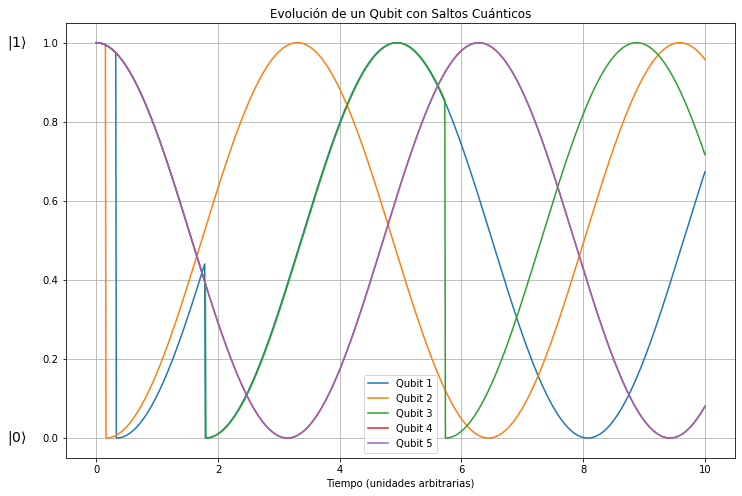

In [7]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 1
psi0 = np.array([0, 1], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 5 # número de qubits
all_trajectories = [] # almacenar

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

for i, trajectory in enumerate(all_trajectories):
    plt.plot(times, trajectory, label=f'Qubit {i+1}')

plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución de un Qubit con Saltos Cuánticos')
plt.legend()
plt.grid()
plt.show()

COMIENZO EN EL ESTADO |0>

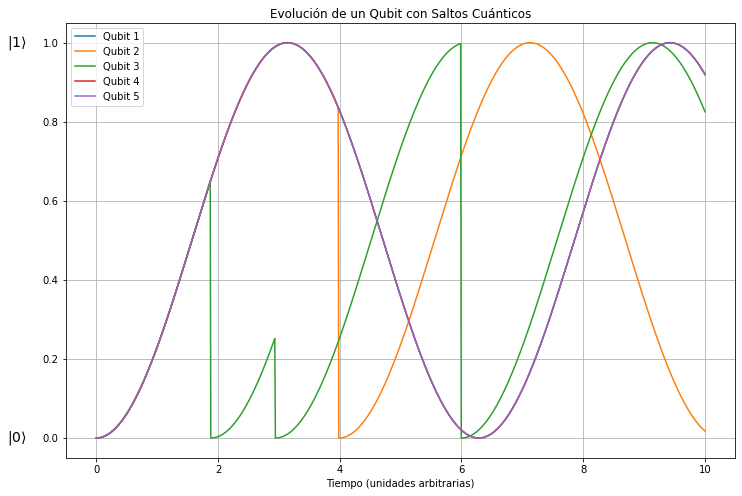

In [5]:
omega = 1.0  # frecuencia de Rabi
gamma = 0.2 
times = np.linspace(0, 10, 1000)
dt = times[1] - times[0]  # dt

# estado inicial 0
psi0 = np.array([1, 0], dtype=np.complex128)

# evolución con el método de saltos cuánticos
def quantum_jump_evolution(omega, gamma, psi0, times):
    dt = times[1] - times[0]
    state = psi0.copy()
    states_over_time = [state.copy()]
    
    for _ in times[:-1]:
        H = omega * np.array([[0, 1], [1, 0]])  # hamiltoniano del ss
        U = np.array([[np.cos(omega * dt/2), -1j*np.sin(omega * dt/2)],
                      [-1j*np.sin(omega * dt/2), np.cos(omega * dt/2)]])  # matriz de evolución (U)
        state = U.dot(state)
        
        # decaimiento
        jump_prob = gamma * np.abs(state[1])**2 * dt
        if np.random.random() < jump_prob:
            state = np.array([1, 0], dtype=np.complex128)  # definimos el salto cuántico al estado 0
        
        # normalizamos
        state /= np.linalg.norm(state)
        states_over_time.append(state.copy())
        
    return np.array(states_over_time)

# múltiples realizaciones
num_realizations = 5
all_trajectories = []

for _ in range(num_realizations):
    states_over_time = quantum_jump_evolution(omega, gamma, psi0, times)
    # probabilidad de estar en el estado 1 en el tiempo
    prob_1 = np.abs(states_over_time[:, 1])**2
    all_trajectories.append(prob_1)

# gráficas
plt.figure(figsize=(12, 8))

for i, trajectory in enumerate(all_trajectories):
    plt.plot(times, trajectory, label=f'Qubit {i+1}')

plt.xlabel('Tiempo (unidades arbitrarias)')
plt.ylabel('')
# plt.yticks([]) 
plt.text(-1.3, 0, r'$|0\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(-1.3, 1, r'$|1\rangle$', horizontalalignment='center', verticalalignment='center', fontsize=14)

plt.title('Evolución de un Qubit con Saltos Cuánticos')
plt.legend()
plt.grid()
plt.show()